In [1]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import numpy as np
import jax
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.gaussian import IsotropicGauss
from mcjax.mcmc.mala import Mala
from mcjax.util.mcmc import ESS_geyer, normalized_autocorr



In [2]:
# initialize jax RNG
key = jr.key(0)

In [3]:
def Sample_Mala(sampler,n_steps, key,initial):
    state_init = sampler.init_state(initial)
    mcmc_output = sampler.run(key = key, n_samples=n_steps, state_init=state_init)
    return mcmc_output["acceptance_rate"]

In [6]:
dim_arr = jnp.arange(1,31,1)
acc_rate_arr1 = []
acc_rate_arr2 = []
acc_rate_arr3 = []
acc_rate = {"acc_rate_arr"+str(i):[] for i in range(1,5)}
for dim in dim_arr:
    # Target distribution
    mu = jnp.full(dim,1.)
    log_var = jnp.log(2)
    dist = IsotropicGauss(mu=mu,log_var=log_var)
    # random walk metropolis
    mcmc1 = Mala(logdensity=dist,epsilon=0.1)
    mcmc2 = Mala(logdensity=dist,epsilon=0.1/dim**(1/3))
    mcmc3 = Mala(logdensity=dist,epsilon=0.1/dim**(1/2))
    mcmc4 = Mala(logdensity=dist,epsilon=0.1/dim)
    mcmc_list = [mcmc1,mcmc2,mcmc3,mcmc4]
    
    # sample the trajectory with step size o(1/d)
    key, key_ = jr.split(key)
    x0 = jnp.zeros((dim,))
    n_steps = 1000_000
    for i in range(1,5):
        acc_rate["acc_rate_arr"+str(i)].append(Sample_Mala(mcmc_list[i-1],n_steps,key,x0))



Text(0.5, 1.0, 'Acceptance rate for different scaling schema of step size')

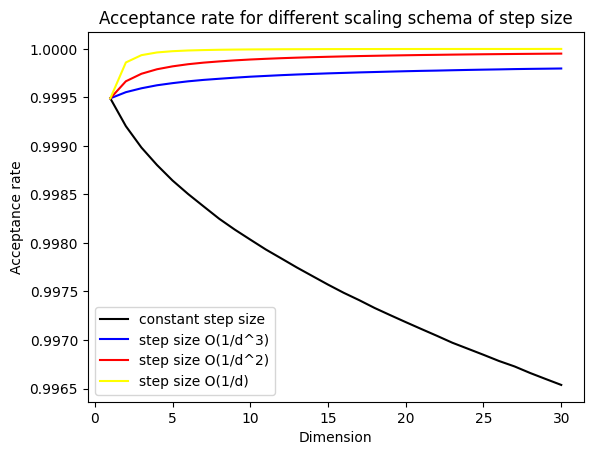

In [7]:
plt.plot(dim_arr,acc_rate["acc_rate_arr1"],color = "black",label="constant step size")
plt.plot(dim_arr,acc_rate["acc_rate_arr2"],color = "blue",label="step size O(1/d^3)")
plt.plot(dim_arr,acc_rate["acc_rate_arr3"],color = "red",label="step size O(1/d^2)")
plt.plot(dim_arr,acc_rate["acc_rate_arr4"],color = "yellow",label="step size O(1/d)")
plt.legend()
plt.xlabel("Dimension")
plt.ylabel("Acceptance rate")
plt.title("Acceptance rate for different scaling schema of step size")
